In [3]:
import csv, pandas as pd, numpy as np, matplotlib.pyplot as plt

In [54]:
def prepare_data():
	df = pd.read_csv('cache-sram_sed.cfg.out.csv')
	df = df.iloc[:, [0, 1, 3, 5, 18]]
	df.insert(0, 'Temperature', [77]*36 + [4]*36 + [300]*36)
	return df

df = prepare_data()

# Index(['Temperature', 'Tech node (nm)', ' Capacity (bytes)', ' Associativity', ' Access time (ns)', ' Data arrary area efficiency %'],

TEMP="Temperature"
TECH="Tech node (nm)"
SIZE=" Capacity (bytes)"
ASSOC=" Associativity"
LATENCY=" Access time (ns)"
AREA=" Data arrary area efficiency %"

df.head(2)

# print all column header names
print(df.columns)

Index(['Temperature', 'Tech node (nm)', ' Capacity (bytes)', ' Associativity',
       ' Access time (ns)', ' Data arrary area efficiency %'],
      dtype='object')


/tmp/ipykernel_2764/2806687886.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tech = df[df[SIZE] == 8192][df[ASSOC] == 8]


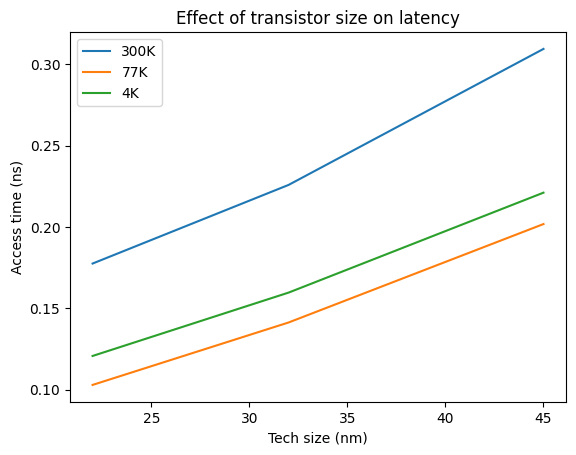

In [44]:
# find all with column2=8192, column3=8
df_tech = df[df[SIZE] == 8192][df[ASSOC] == 8]
df_tech


# Group the DataFrame by the unique values in column 0
group_tech = df_tech.groupby('Temperature')
group_tech = reversed(list(group_tech))

# Create a new plot for each group
plt.figure()

# Iterate over each group
for group_name, group_data in group_tech:
    
    # Plot x-axis values from column 1 and y-axis values from column 4
    plt.plot(group_data['Tech node (nm)'], group_data[' Access time (ns)'], label=f"{group_name}K")

# Set labels and title
plt.xlabel('Tech size (nm)')
plt.ylabel('Access time (ns)')
plt.title(f'Effect of transistor size on latency')

# Show legend
plt.legend()

# Show the plot
plt.show()


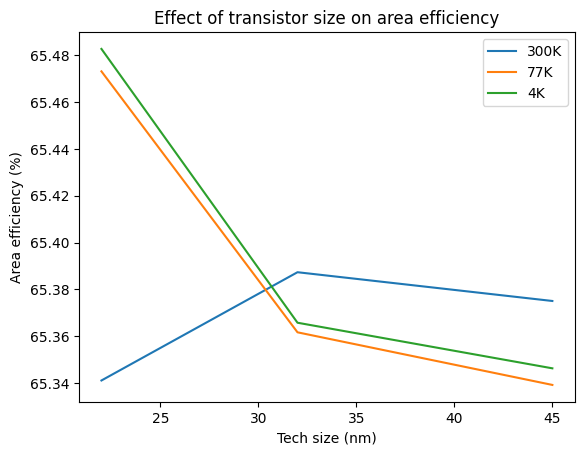

In [47]:
# now instead of tech size, graph area efficiency

# Group the DataFrame by the unique values in column 0
group_tech = df_tech.groupby('Temperature')
group_tech = reversed(list(group_tech))

# Create a new plot for each group
plt.figure()

# Iterate over each group
for group_name, group_data in group_tech:
    
    # Plot x-axis values from column 1 and y-axis values from column 4
    plt.plot(group_data['Tech node (nm)'], group_data[' Data arrary area efficiency %'], label=f"{group_name}K")

# Set labels and title
plt.xlabel('Tech size (nm)')
plt.ylabel('Area efficiency (%)')
plt.title(f'Effect of transistor size on area efficiency')

# Show legend
plt.legend()

# Show the plot
plt.show()

/tmp/ipykernel_2764/820832637.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_size = df[df[TECH] == 32][df[ASSOC] == 8]


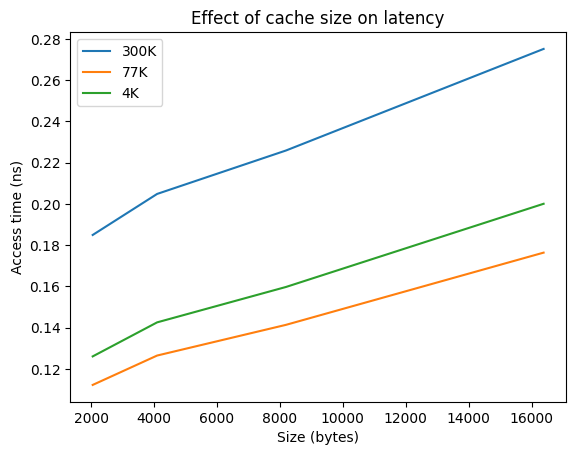

,Temperature,Tech node (nm),Capacity (bytes),Associativity,Access time (ns),Data arrary area efficiency %
7,77,32,2048,8,0.112223,35.5867
16,77,32,4096,8,0.126468,51.0403
25,77,32,8192,8,0.141355,65.3616
34,77,32,16384,8,0.176379,76.1767
43,4,32,2048,8,0.126055,35.5930
52,4,32,4096,8,0.142561,51.0463
61,4,32,8192,8,0.159723,65.3657
70,4,32,16384,8,0.200072,76.1783
79,300,32,2048,8,0.184948,35.6174
88,300,32,4096,8,0.204846,51.0718


In [68]:
df_size = df[df[TECH] == 32][df[ASSOC] == 8]
group_size = df_size.groupby('Temperature')
group_size = reversed(list(group_size))

plt.figure()
for group_name, group_data in group_size:
	plt.plot(group_data[' Capacity (bytes)'], group_data[' Access time (ns)'], label=f"{group_name}K")
plt.xlabel('Size (bytes)')
plt.ylabel('Access time (ns)')
plt.title(f'Effect of cache size on latency')

plt.legend()
plt.show()
df_size[]

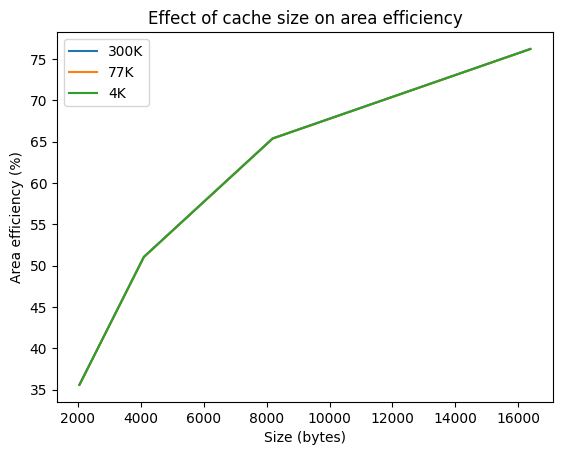

In [75]:
group_size = df_size.groupby('Temperature')
group_size = reversed(list(group_size))

plt.figure()
for group_name, group_data in group_size:
# group_name, group_data = next(group_size)
# group_name, group_data = next(group_size)
# group_name, group_data = next(group_size)
	plt.plot(group_data[' Capacity (bytes)'], group_data[' Data arrary area efficiency %'], label=f"{group_name}K")
plt.xlabel('Size (bytes)')
plt.ylabel('Area efficiency (%)')
plt.title(f'Effect of cache size on area efficiency')

plt.legend()
plt.show()


/tmp/ipykernel_2764/403860244.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_assoc = df[df[TECH] == 32][df[SIZE] == 8192]


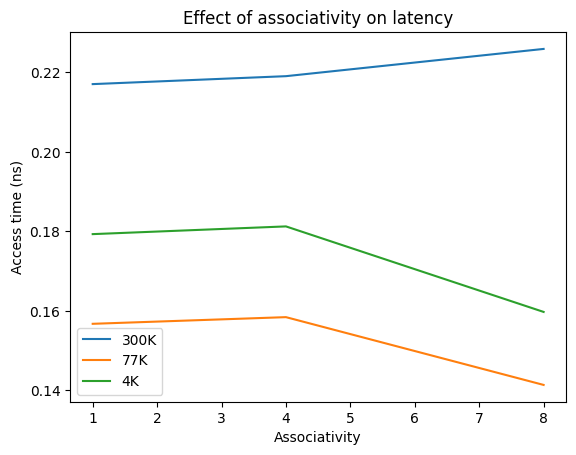

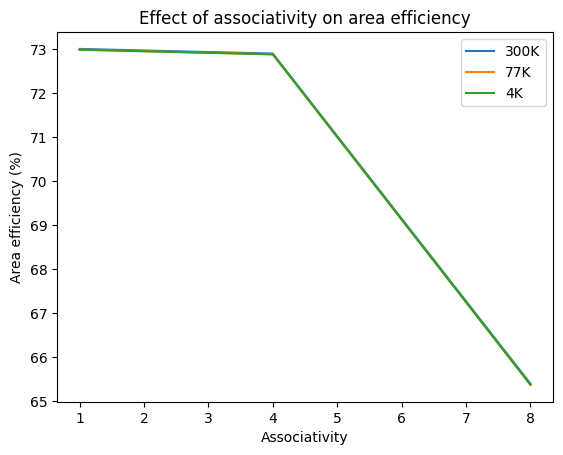

In [76]:
df_assoc = df[df[TECH] == 32][df[SIZE] == 8192]
group_assoc = df_assoc.groupby('Temperature')
group_assoc = reversed(list(group_assoc))

plt.figure()
for group_name, group_data in group_assoc:
	plt.plot(group_data[' Associativity'], group_data[' Access time (ns)'], label=f"{group_name}K")
plt.xlabel('Associativity')
plt.ylabel('Access time (ns)')
plt.title(f'Effect of associativity on latency')

plt.legend()
plt.show()

group_assoc = df_assoc.groupby('Temperature')
group_assoc = reversed(list(group_assoc))

plt.figure()
for group_name, group_data in group_assoc:
	plt.plot(group_data[' Associativity'], group_data[' Data arrary area efficiency %'], label=f"{group_name}K")
plt.xlabel('Associativity')
plt.ylabel('Area efficiency (%)')
plt.title(f'Effect of associativity on area efficiency')

plt.legend()
plt.show()


In [20]:
cache_miss_df = pd.read_csv('configs/cache-sram_miss.cfg.out')
dram_miss_df = pd.read_csv('configs/DRAM_miss.cfg.out')

dram_miss_df

times = []
mm_time = 0
with open('hit_miss.out') as f:
    data = f.readlines()
    for line in data:
        if line.find('Access time (ns)') != -1:
            times.append(line.split(' ')[-1].strip())
        if line.find('t_RAS (Row access strobe latency):') != -1:
            mm_time += float(line.split(' ')[-2].strip())
        if line.find('t_CAS') != -1:
            mm_time += float(line.split(' ')[-2].strip())
        if line.find('t_RP') != -1:
            mm_time += float(line.split(' ')[-2].strip())
            times.append(mm_time)
            mm_time = 0


In [23]:
print('\tL1,\tL2,\tMM')
print(f"4K: {times[0:3]}")
print(f"77K: {times[3:6]}")
print(f"300K: {times[6:9]}")

	L1,	L2,	MM
4K: ['0.238356', '0.379856', 10.790980000000001]
77K: ['0.215129', '0.365081', 10.36492]
300K: ['0.424895', '0.786879', 24.45274]
